In [0]:
import os
import cv2
import io
import pickle
import requests
import zipfile
import numpy as np
from scipy import ndimage
from skimage.transform import resize
from imageio import imread, imsave
from skimage import img_as_float, color, exposure
from skimage.feature import peak_local_max, hog
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
r1 = requests.get('https://github.com/mf00589/COM2028/raw/master/signaturetest.zip')
z1 = zipfile.ZipFile(io.BytesIO(r1.content))
z1.extractall()

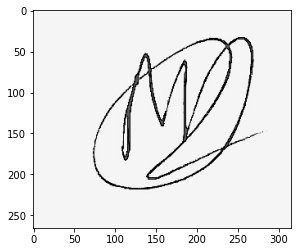

In [0]:
DATADIR = './signaturetest'
CATEGORIES = ['Signature1','signature2']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      plt.imshow(img_array)
      plt.show()
      break
    break 
     

In [0]:
print(img_array)

[[[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 ...

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]]


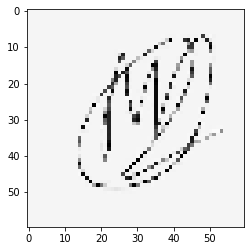

In [0]:
new_array= cv2.resize(img_array, (60,60))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [0]:
training_data2 = []

def create_training_data2():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (60,60))
      training_data2.append([new_array, class_num])

create_training_data2()

In [0]:
print(len(training_data2))

107


In [0]:
import random 

random.shuffle(training_data2)

In [0]:
for sample in training_data2[:20]:
  print(sample[1])


0
1
1
1
0
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1


In [0]:
X1 = []
y1 = []

In [0]:
for features, label in training_data2:
  X1.append(features)
  y1.append(label)


X1 = np.array(X1).reshape(-1, 60 , 60, 1)

In [0]:
X1.shape
print(len(X1))
print(len(y1))
##y1[11]
y1 = np.array(y1)
y1[10]

107
107


0

In [0]:
X1[1]

array([[[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       ...,

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]]], dtype=uint8)

In [0]:
from sklearn.model_selection import  train_test_split
import tensorflow as tf

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1)

80


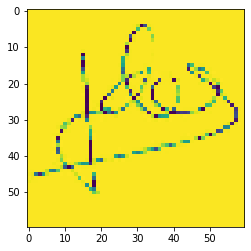

In [0]:
print(len(X_train))
plt.imshow(tf.squeeze(X_train[2]))
plt.show()


In [0]:
y_train[2]

1

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(60, 60, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 58, 58, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        16448     
Total params: 54,016
Trainable params: 54,016
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.add(Activation('sigmoid'))


In [0]:
model.compile(optimizer='Adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(X_train, y_train,batch_size=3, epochs=3,validation_data=(X_test, y_test))

Epoch 1/3
27/27 [==============================] - 1s 32ms/step - loss: 3.4846 - accuracy: 0.7500 - val_loss: 3.5482 - val_accuracy: 0.4815
Epoch 2/3
27/27 [==============================] - 1s 28ms/step - loss: 0.6814 - accuracy: 0.8875 - val_loss: 0.1238 - val_accuracy: 0.9630
Epoch 3/3
27/27 [==============================] - 1s 27ms/step - loss: 0.7816 - accuracy: 0.8875 - val_loss: 0.2650 - val_accuracy: 0.9630


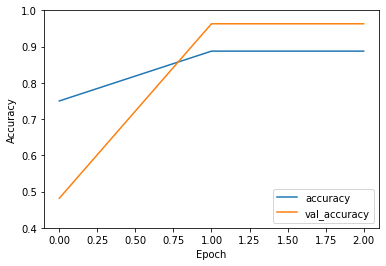

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')